Name - Sakshi Patadiya

ID - 202101469

Course - IT496

Course Project - 2

### **Smoking and Drinking Dataset with body signal**

This dataset is collected from National Health Insurance Service in Korea. All personal information and sensitive data have been excluded.

The purpose of this dataset is to:
1. Analysis of body signal
2. Classification of smoker or drinker

In [111]:
import math
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

Importing the required libraries and creating a data frame for the dataset.

In [112]:
df = pd.read_csv('smoking_driking_dataset_Ver01.csv')
pd.set_option('display.max_columns', None)
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,80.0,99.0,193.0,48.0,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,82.0,106.0,228.0,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,70.0,98.0,136.0,41.0,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,87.0,95.0,201.0,76.0,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,82.0,101.0,199.0,61.0,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


### **1. Exploratory Data Analysis (EDA)**

In [113]:
df.shape 

(991346, 24)

There are 991346 rows and 24 columns.

In [114]:
df.columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')

These are the columns or the features present in our dataset.

In [115]:
df.dtypes

sex                  object
age                   int64
height                int64
weight                int64
waistline           float64
sight_left          float64
sight_right         float64
hear_left           float64
hear_right          float64
SBP                 float64
DBP                 float64
BLDS                float64
tot_chole           float64
HDL_chole           float64
LDL_chole           float64
triglyceride        float64
hemoglobin          float64
urine_protein       float64
serum_creatinine    float64
SGOT_AST            float64
SGOT_ALT            float64
gamma_GTP           float64
SMK_stat_type_cd    float64
DRK_YN               object
dtype: object

In [116]:
df.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000
mean,47.614491,162.240625,63.284050,81.233358,0.980834,0.978429,1.031495,1.030476,122.432498,76.052627,100.424447,195.557020,56.936800,113.037692,132.141751,14.229824,1.094224,0.860467,25.989308,25.755051,37.136347,1.608122
std,14.181339,9.282957,12.514241,11.850323,0.605949,0.604774,0.174650,0.171892,14.543148,9.889365,24.179960,38.660155,17.238479,35.842812,102.196985,1.584929,0.437724,0.480530,23.493386,26.308599,50.424153,0.818507
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,67.000000,32.000000,25.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,88.000000,169.000000,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,96.000000,193.000000,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,105.000000,219.000000,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,273.000000,185.000000,852.000000,2344.000000,8110.000000,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [118]:
def grab_col_names(dataframe, cat_th=10):
    
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_cols = cat_cols + num_but_cat
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f'categorical columns: {len(cat_cols)}')
    print(cat_cols)
    print()
    print(f'numeric columns: {len(num_cols)}')
    print(num_cols)
    print()
    print(f'numerical columns which are categorical in nature: {len(num_but_cat)}')
    print(num_but_cat)
    print()

    return cat_cols, num_cols

categorical_columns, numeric_columns = grab_col_names(df)

categorical columns: 6
['sex', 'DRK_YN', 'hear_left', 'hear_right', 'urine_protein', 'SMK_stat_type_cd']

numeric columns: 18
['age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP']

numerical columns which are categorical in nature: 4
['hear_left', 'hear_right', 'urine_protein', 'SMK_stat_type_cd']



In [119]:
def print_unique_values(df):
    for column in categorical_columns:
            print(f'{column}: {df[column].unique()}')

In [120]:
print_unique_values(df)

sex: ['Male' 'Female']
DRK_YN: ['Y' 'N']
hear_left: [1. 2.]
hear_right: [1. 2.]
urine_protein: [1. 3. 2. 4. 5. 6.]
SMK_stat_type_cd: [1. 3. 2.]


These are the unique values that the features can take in the dataset.

**Boxplots**

**Now, plotting the boxplot for several features which are numberical in nature.**

A Box plot is a way to visualize the distribution of the data by using a box and some vertical lines. It is known as the whisker plot. The data can be distributed between five key ranges, which are as follows:

- Minimum: Q1-1.5*IQR
- 1st quartile (Q1): 25th percentile
- Median: 50th percentile
- 3rd quartile(Q3): 75th percentile
- Maximum: Q3+1.5*IQR
- Here IQR represents the InterQuartile Range which starts from the first quartile (Q1) and ends at the third quartile (Q3).

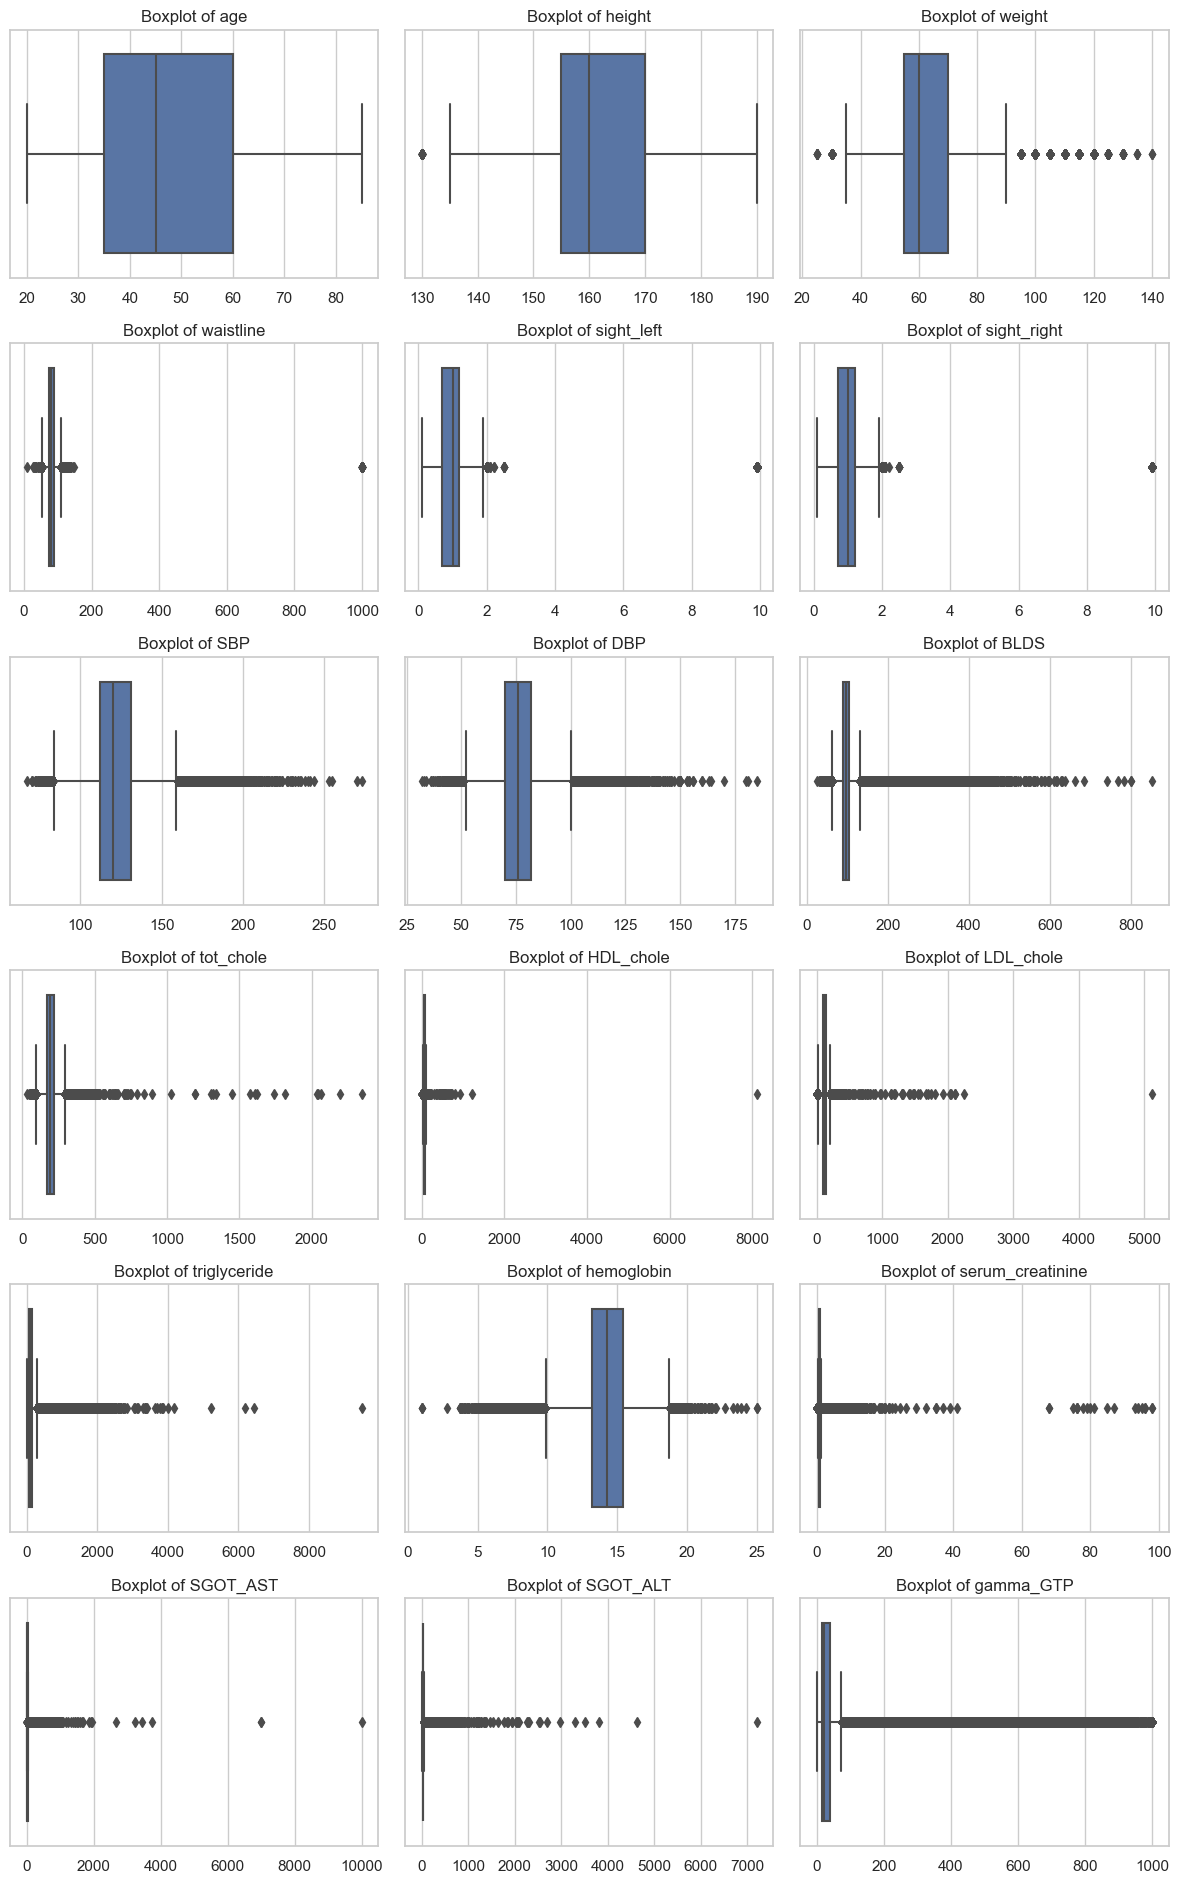

In [121]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(8, 3, figsize=(12, 25))
axes = axes.flatten()

for ax, col in zip(axes, numeric_columns):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(f'Boxplot of {col}')
    ax.set_xlabel('')
    ax.set_ylabel('')

for i in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

On plotting various Boxplots of numerical features, we find that there could be several outliers in the boxplots and they need to be removed.

In [122]:
print('Outlier in percentage')

for col in numeric_columns:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    count=0
    for val in df[col]:
        if val>upper or val<lower:
            count=count+1

    print(col +' : '+str(count/len(df[col])*100)+' %')

Outlier in percentage
age : 0.0 %
height : 0.008675074091185116 %
weight : 1.9388790593798735 %
waistline : 0.4455558402414495 %
sight_left : 1.168310559582628 %
sight_right : 1.0586616579882302 %
SBP : 1.5974241082326455 %
DBP : 1.323654909587571 %
BLDS : 6.476245427933335 %
tot_chole : 1.1396626404908075 %
HDL_chole : 1.3978974041353878 %
LDL_chole : 1.0186150950324107 %
triglyceride : 5.457630332900925 %
hemoglobin : 0.9845200363949621 %
serum_creatinine : 0.8074880011620565 %
SGOT_AST : 6.820423948853377 %
SGOT_ALT : 7.356462829324978 %
gamma_GTP : 9.496381687120339 %


These numbers in percentage shows the percentage of outliers in each of the numerical columns which needs to be removed in order to train our model efficiently.

**Pie charts**

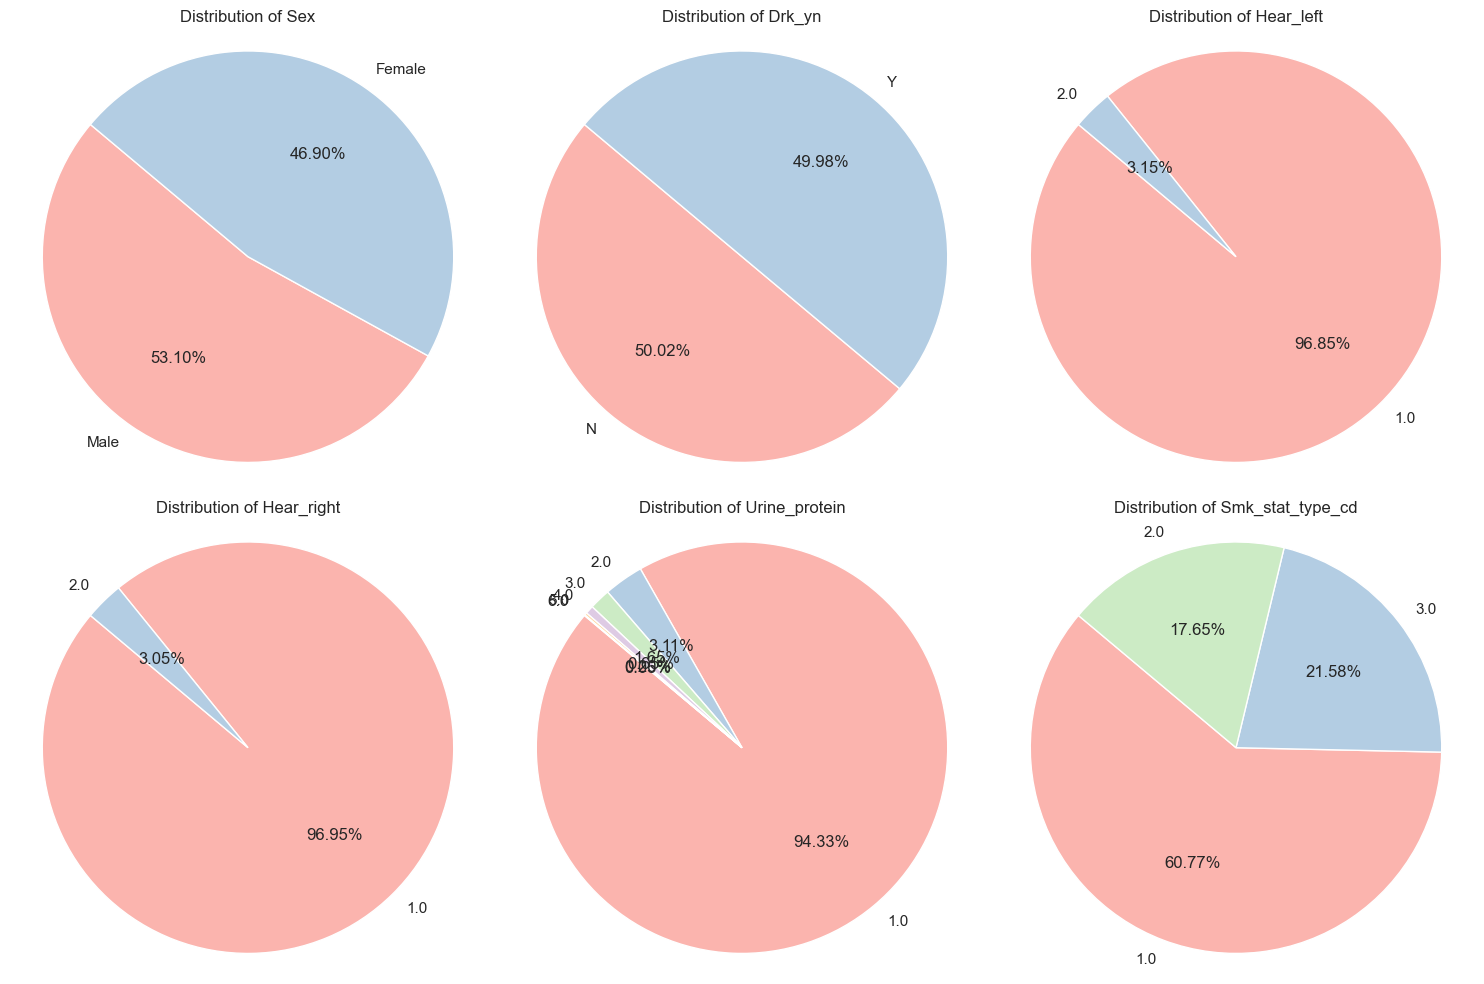

In [123]:
features = df[categorical_columns]

num_rows = 2
num_cols =  3 
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

color_palette = sns.color_palette('Pastel1')
axes = axes.flatten()

for idx, feature in enumerate(features):
    feature_counts = df[feature].value_counts()
    labels = feature_counts.index
    sizes = feature_counts.values
    colors = color_palette[:len(labels)]

    ax = axes[idx]
    ax.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140)
    ax.set_title(f'Distribution of {feature.capitalize()}')
    ax.axis('equal')

for i in range(len(features), num_rows * num_cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

These Pie-charts shows the distribution of the Categorical columns and helps us in understanding the Biasness of the data.

We can see that the features,
1. Sex
2. DRK_YN

are almost equally distributed.

Whereas the features,
1. Hear_left
2. Hear_right
3. Urine_protein
4. Smk_stat_type_cd

are biased towards a certain value.

**Scatter Plots**

Here, we are plotting scatter plots for each of the columns in dataset against the SMK_stat_type_cd in order to find out how each of the features affect or vary with the Smoking habits of the person.

The smoking history column (SMK_stat_type_cd) is distributes as follows;

1.0 - Non Smokers

2.0 - Ex smokers

3.0 - Smokers

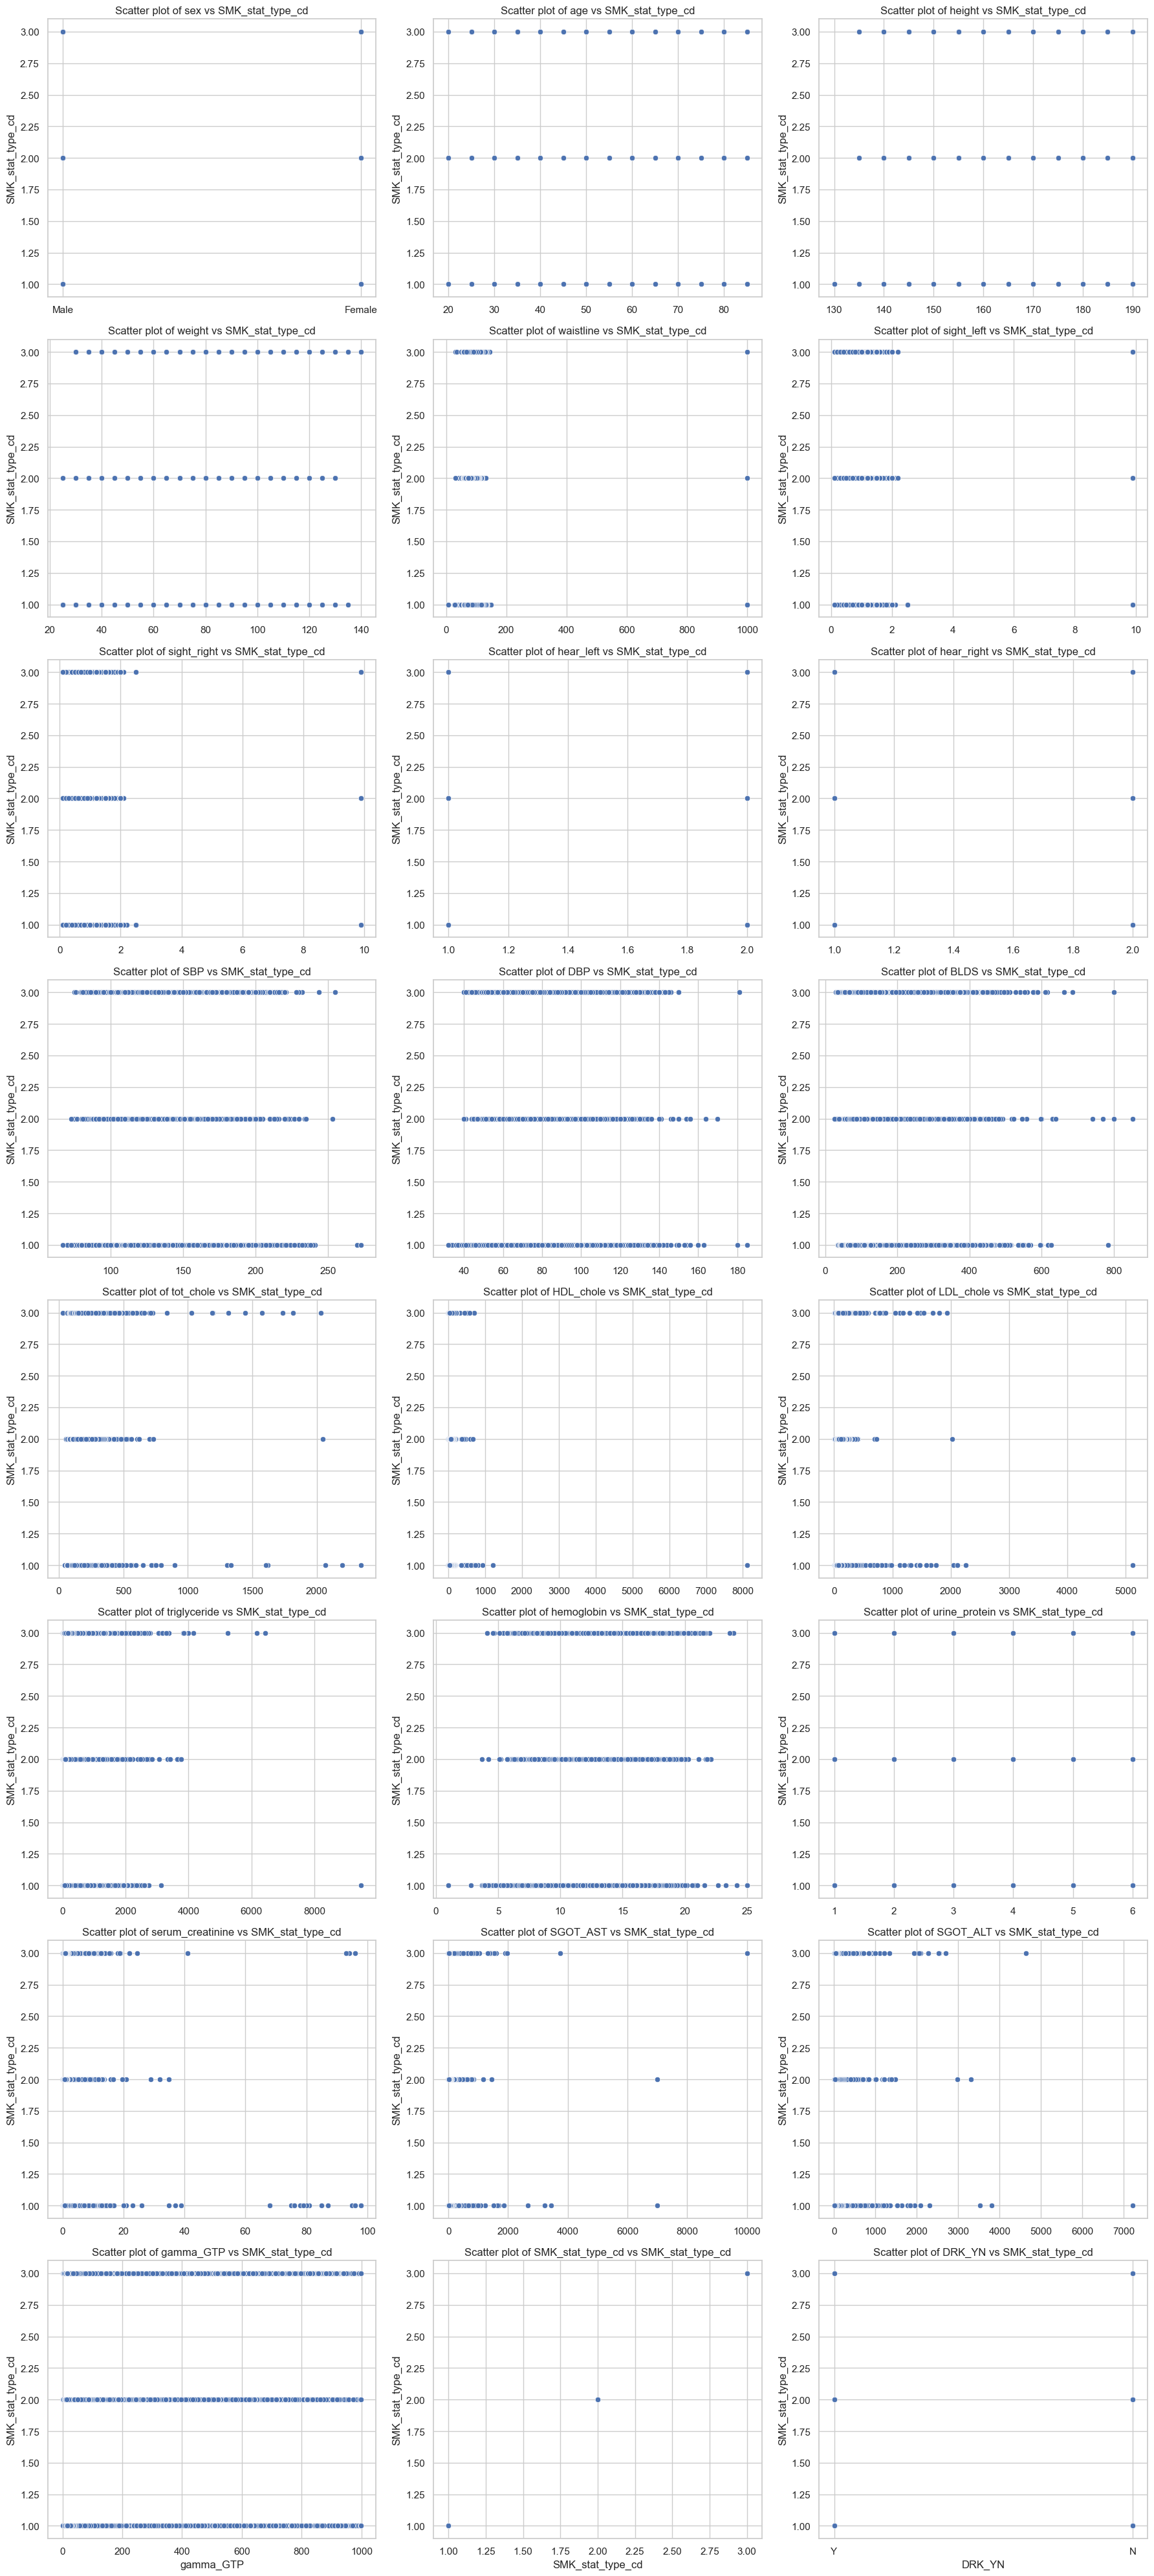

In [124]:
sns.set_theme(style="whitegrid")

y_column = "SMK_stat_type_cd"
x_columns = [col for col in df]
num_plots = len(x_columns)
num_rows = (num_plots + 2) // 3 
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5 * num_rows))
axes = axes.flatten()

for i, x_col in enumerate(x_columns):
    sns.scatterplot(x=df[x_col], y=df[y_column], ax=axes[i])
    axes[i].set_title(f'Scatter plot of {x_col} vs {y_column}')
    if i < (num_rows - 1) * 3:
        axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

As SMK_stat_type_cd is a categorical columns with 3 unique values in it, we find how the values in each of the features vary according to it.

**Heatmap or correlation matrix**

It is used to find the correlation between various Numerical Columns in our dataset.

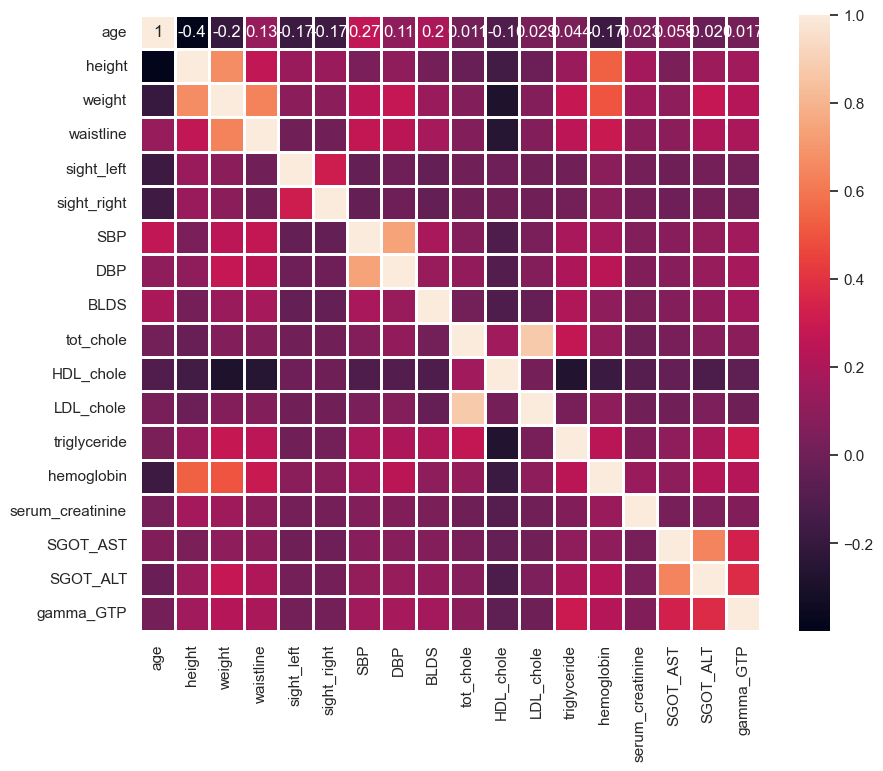

In [125]:
numeric_df = df[numeric_columns]
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=1)
plt.show()

High correlation can be seen between the following from the heatmap:
1. Height and Weight
2. Height and Hemoglobin
3. Height and SMK_stat_type_cd
4. Weight and Waistline
5. Weight and Hemoglobin
6. Weight and SMK_stat_type_cd
7. Sight_right and Sight_left
8. Hear_right and Hear_left
9. DBP and SBP
10. LDL_chole and tot_chole
11. SMK_stat_type_cd and Hemoglobin
12. SGOT_ALT and SGOT_AST
13. Gamma_GTP and SGOT_ALT

All of them have a positive correlation greater than **0.3**.

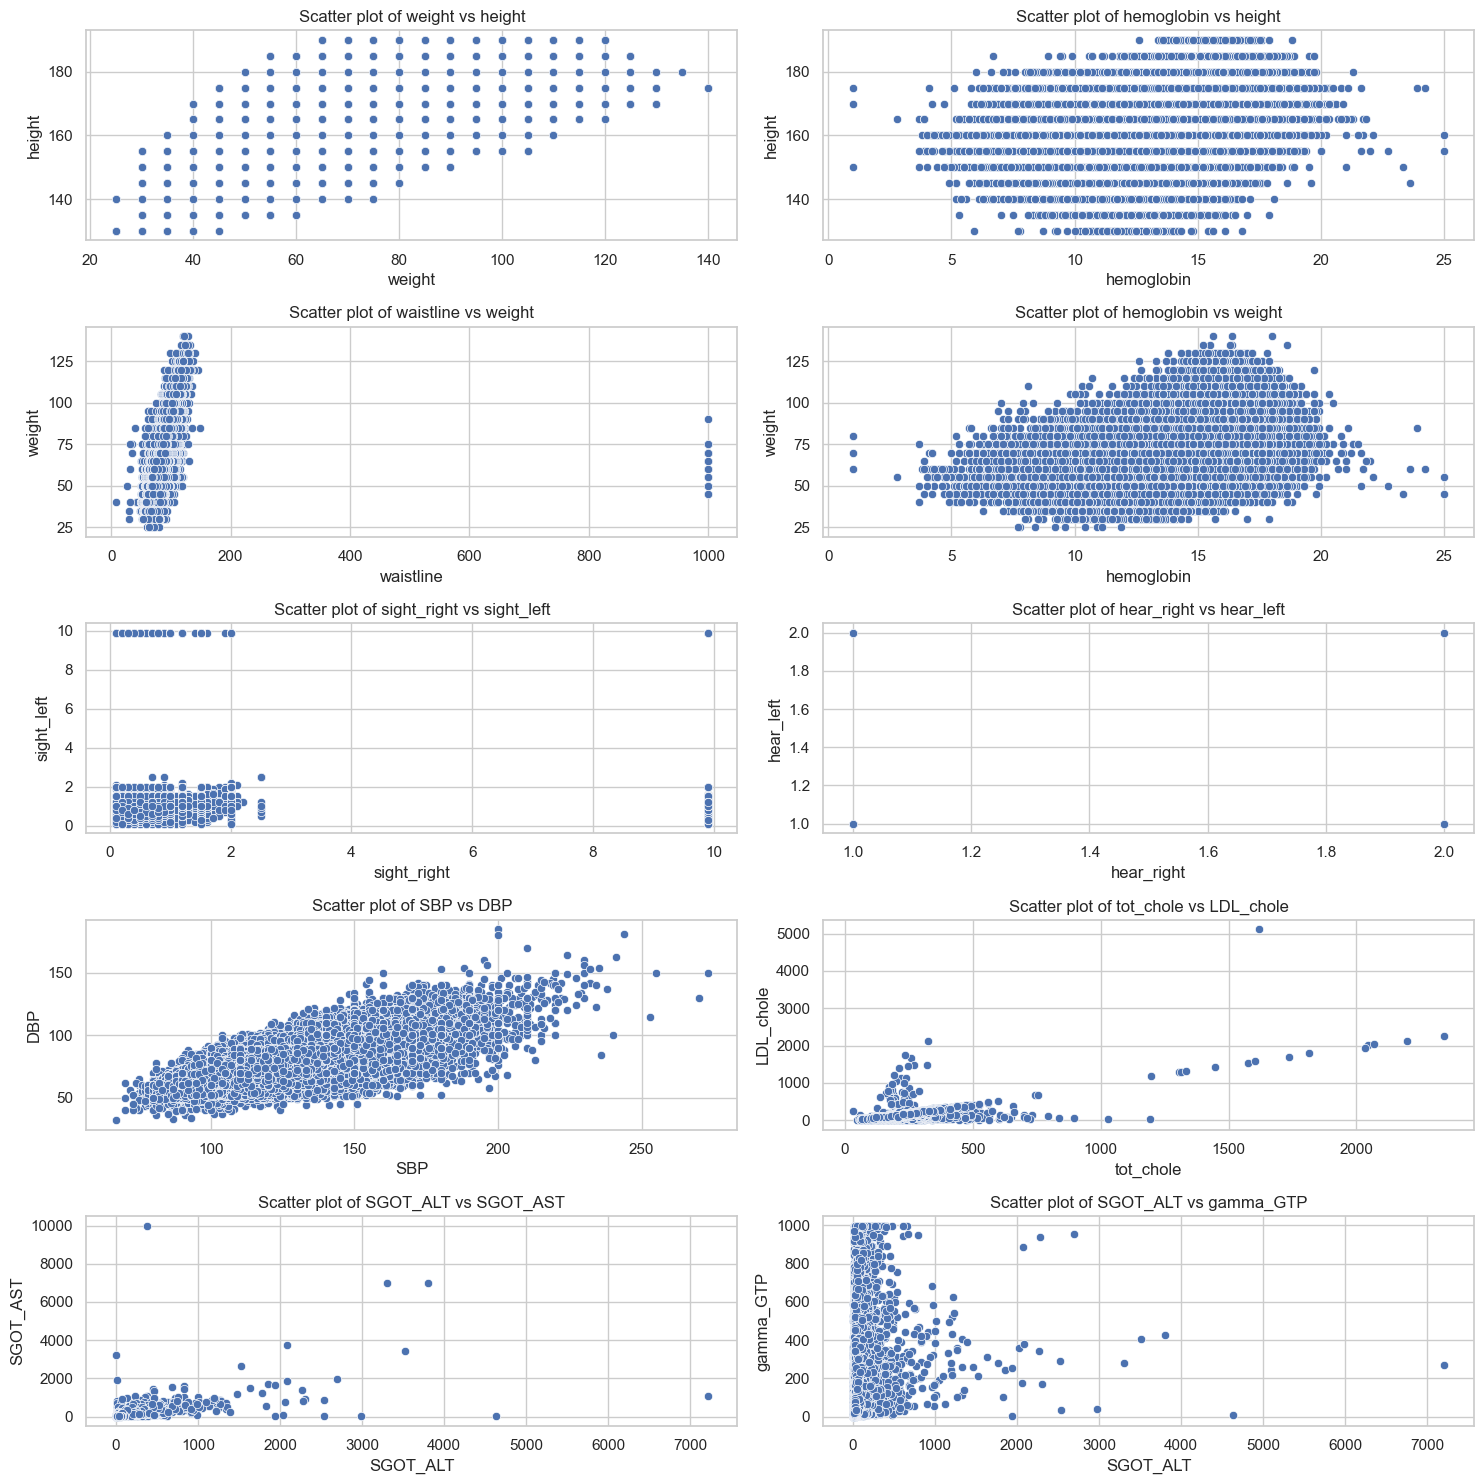

In [126]:
sns.set_theme(style="whitegrid")

y_column = ["height","height","weight","weight","sight_left","hear_left","DBP","LDL_chole","SGOT_AST","gamma_GTP"]
x_column = ["weight","hemoglobin","waistline","hemoglobin","sight_right","hear_right","SBP","tot_chole","SGOT_ALT","SGOT_ALT"]

fig, axes = plt.subplots(5, 2, figsize=(15, 15))
axes = axes.flatten()

for i in range(10):
    sns.scatterplot(x=df[x_column[i]], y=df[y_column[i]], ax=axes[i])
    axes[i].set_title(f'Scatter plot of {x_column[i]} vs {y_column[i]}')

plt.tight_layout()
plt.show()

These are the required scattered plots, which shows the correlation between the most related or highly correlated columns (features).

**Histograms**

C:\Users\Admin\AppData\Local\Temp\ipykernel_19092\1918324354.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=ax[axid])
C:\Users\Admin\AppData\Local\Temp\ipykernel_19092\1918324354.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=ax[axid])
C:\Users\Admin\AppData\Loc

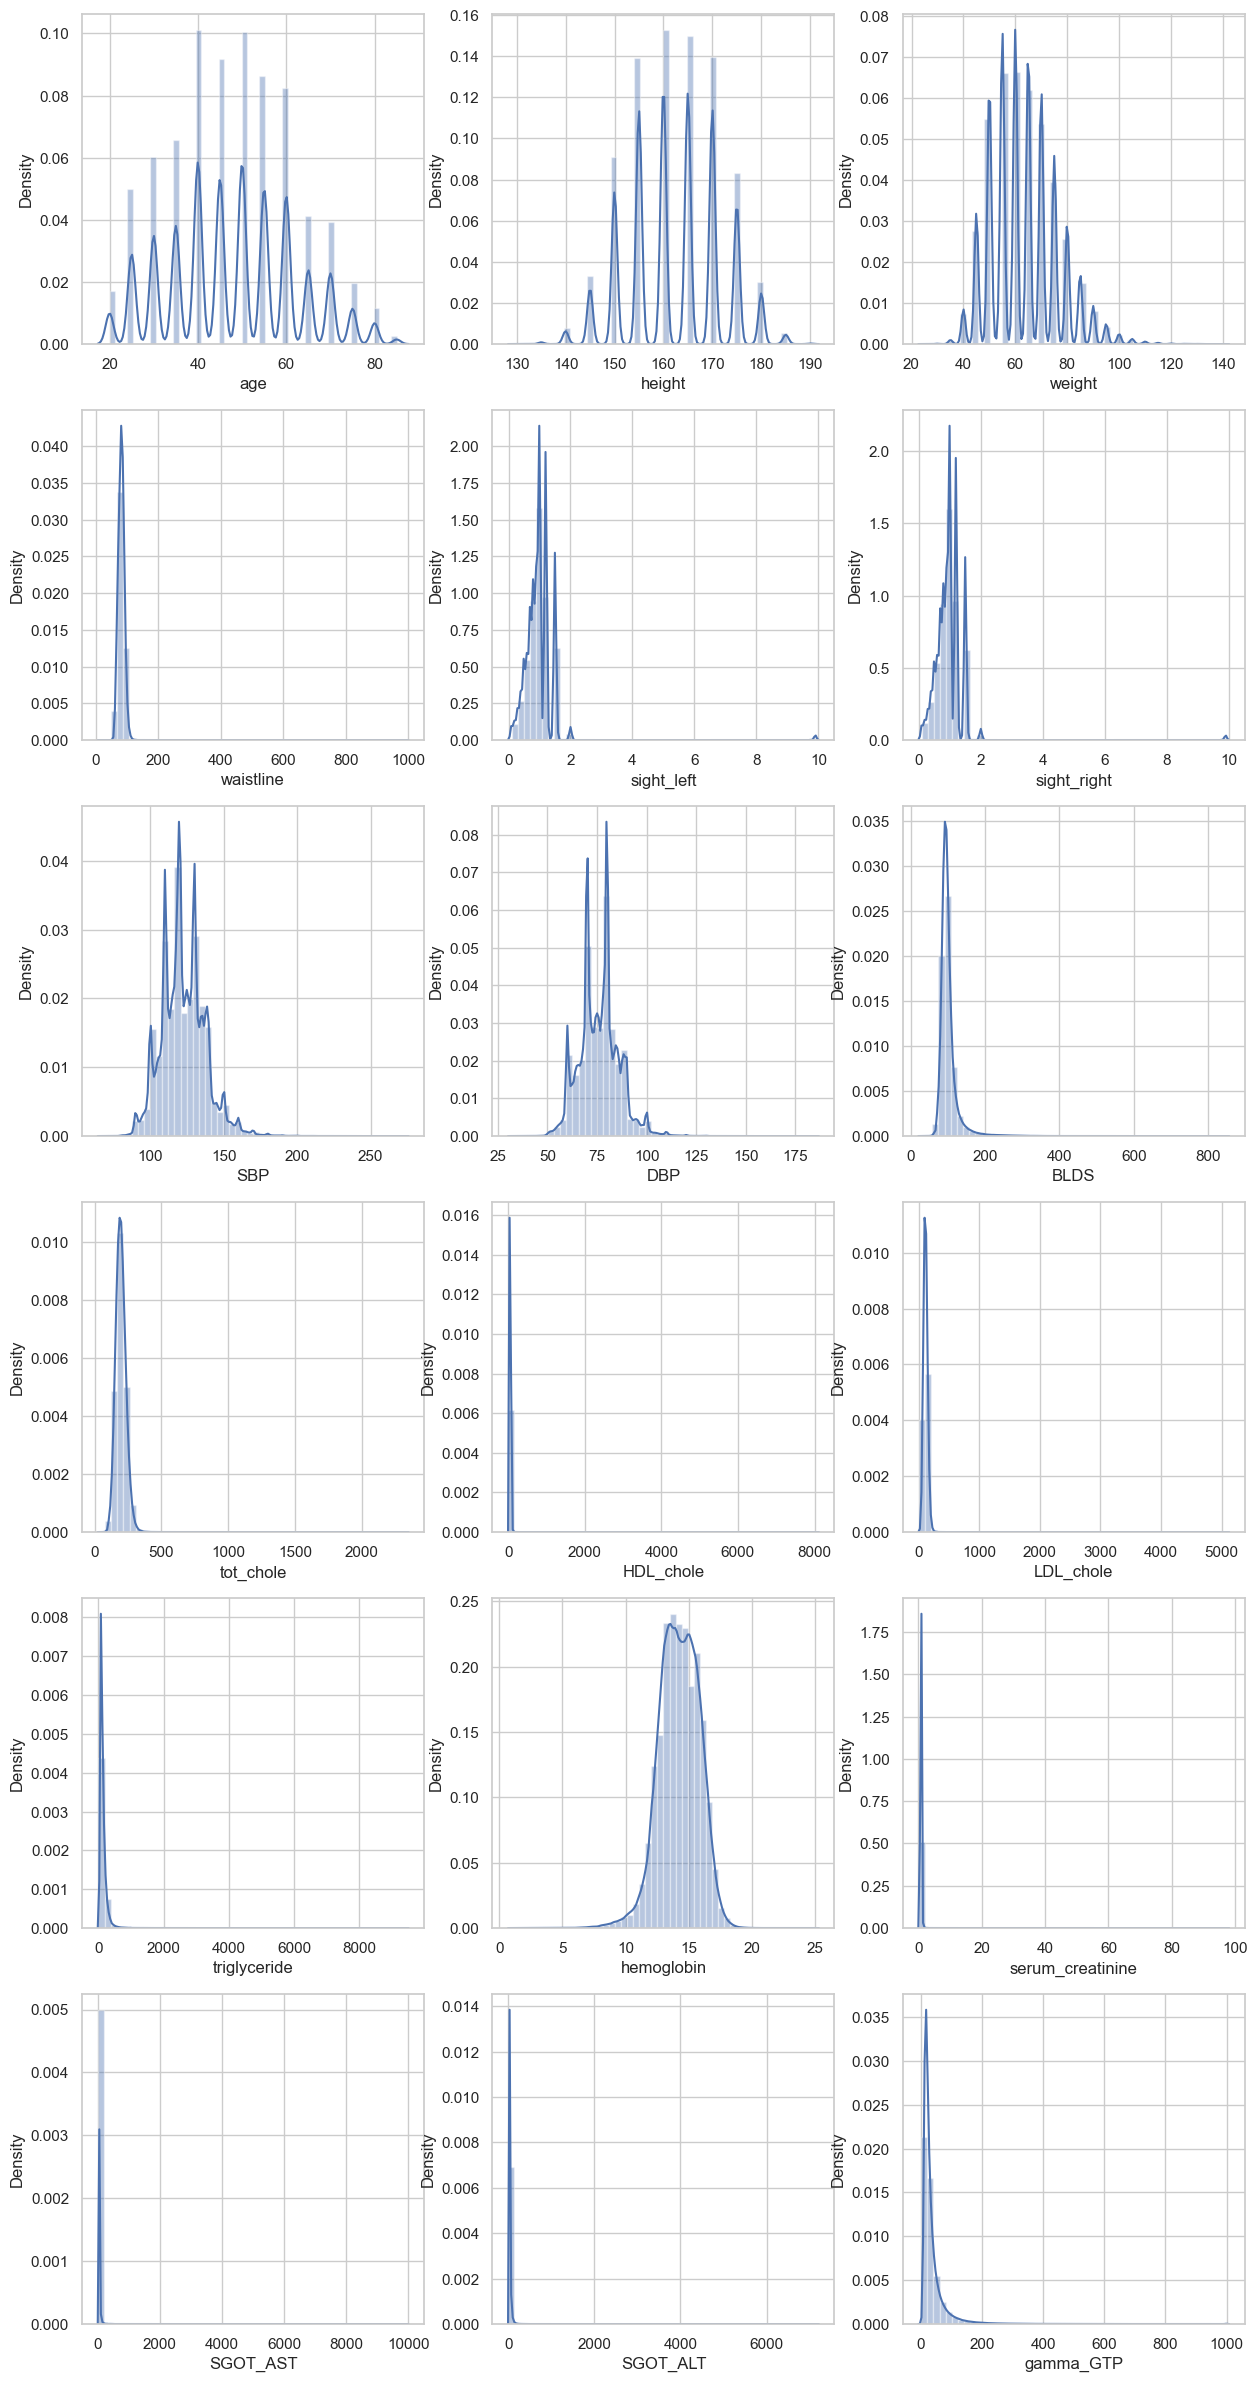

In [127]:
fig, ax = plt.subplots(6, 3, figsize=(15, 30))
ax=ax.ravel()

for axid, col in enumerate(numeric_columns):
    sns.distplot(df[col], ax=ax[axid])
    plt.title=col

On plotting these distplots, we can see how the numerical data columns have their data distributed and whats there frequency or density.

In [128]:
print('Skewness for each numerical column')
for col in numeric_columns:
    print(col+' : '+str(df[col].skew()))

Skewness for each numerical column
age : 0.1536533871360202
height : -0.022737170425321796
weight : 0.5765565985058512
waistline : 26.78843978031659
sight_left : 9.994625971918909
sight_right : 10.033647020337831
SBP : 0.48206031829566537
DBP : 0.4000337997282636
BLDS : 4.6173774594196955
tot_chole : 1.5568817248099913
HDL_chole : 104.57763509143004
LDL_chole : 5.2517393773591285
triglyceride : 6.529372850852242
hemoglobin : -0.3839878001506678
serum_creatinine : 111.02205804336974
SGOT_AST : 150.49168971442893
SGOT_ALT : 50.038872293452705
gamma_GTP : 7.718509301560342


On finding the skewness for this numerical data columns, the features
1. waistline
2. HDL_chole
3. serum_creatinine
4. SGOT_AST
5. SGOT_ALT

are found to have high degree of skewness. Hence, this skewness needs to be dealt with scaling and transforming the data.

**Countplots**

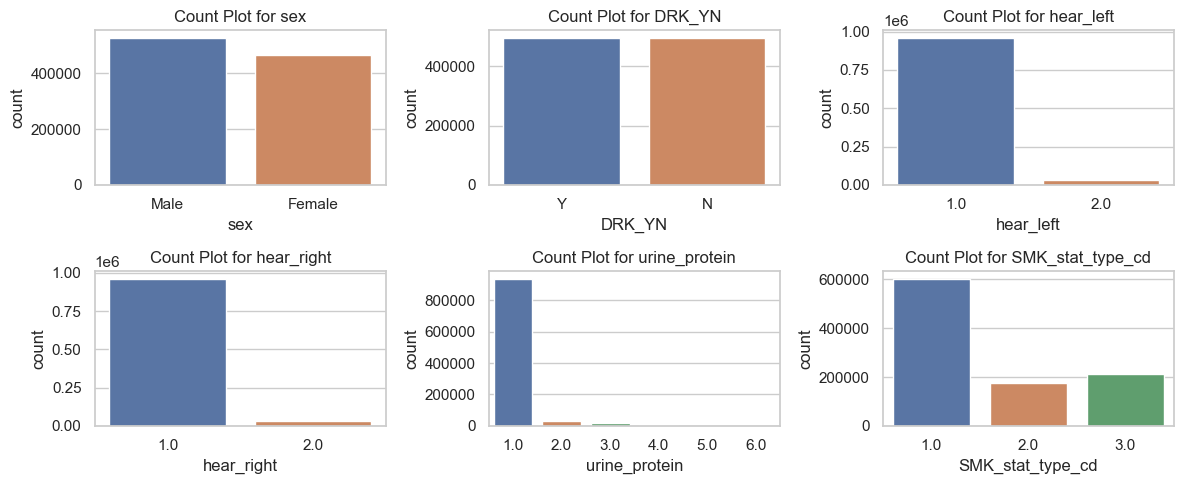

In [129]:
columns_to_plot = categorical_columns

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 5))
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    sns.countplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f'Count Plot for {column}')

plt.tight_layout()
plt.show()

These count plots shows how the data is distributed in the dataset and shows the count of each value in the feature to compare which value occurs maximum or minimum times and helps in understanding the distribution properly.

<Axes: xlabel='SMK_stat_type_cd', ylabel='count'>

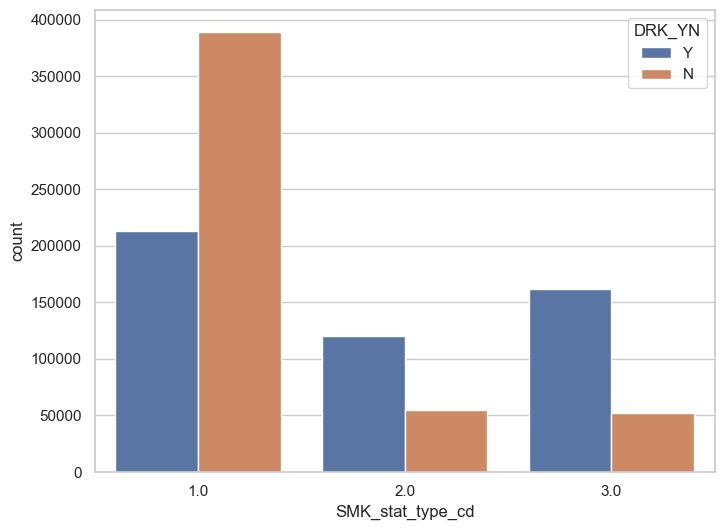

In [130]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="SMK_stat_type_cd", hue="DRK_YN")

Here, we see that most of the smokers are also involved in drinking related activities, and most of the non-smokers are also such that majority of them are not involved in drinking activities.

<Axes: xlabel='SMK_stat_type_cd', ylabel='count'>

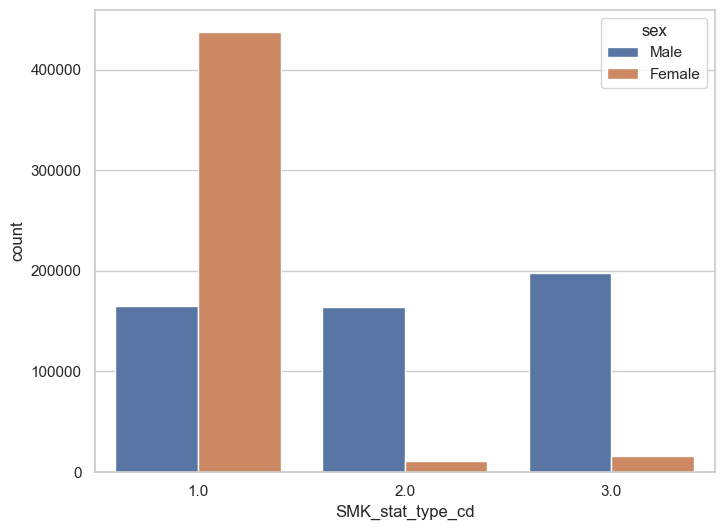

In [131]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="SMK_stat_type_cd", hue="sex")

A small proportion of women are smokers, whereas among men, there is a relatively equal distribution, with most being either current smokers or individuals who have smoked in the past.

In [132]:
non_smokers = df[df['SMK_stat_type_cd'] == 1.0]
ex_smokers = df[df['SMK_stat_type_cd'] == 2.0]
smokers = df[df['SMK_stat_type_cd'] == 3.0]

Text(0.5, 1.0, 'Smokers')

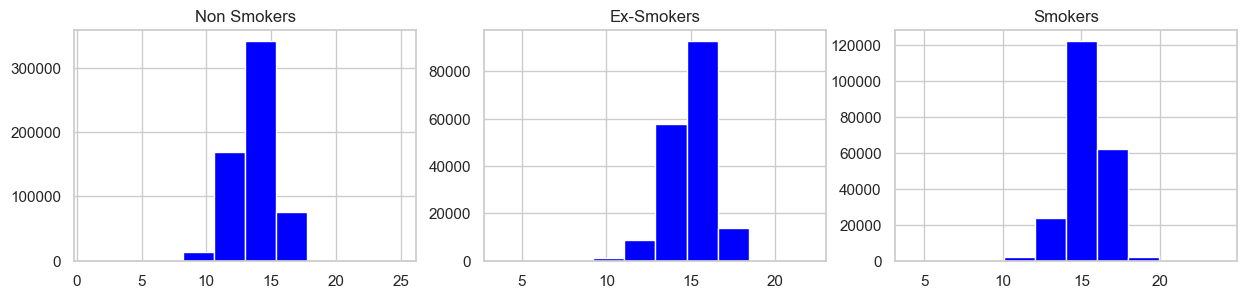

In [133]:
fig,axes = plt.subplots (nrows=1,ncols=3,figsize =(15,3))
axes[0].hist(non_smokers['hemoglobin'],color = 'blue')
axes[0].set_title('Non Smokers')
axes[1].hist(ex_smokers['hemoglobin'],color = 'blue')
axes[1].set_title('Ex-Smokers')
axes[2].hist(smokers['hemoglobin'],color = 'blue')
axes[2].set_title('Smokers')

From this, we can see the hemoglobin levels of all the people who are Non-smokers, Ex-Smokers and Smokers.

But in order to derive some valuable conclusions, we need to plot all of them together.

Text(0.5, 0.98, 'Hemoglobin level of Smokers, Ex-Smokers and Non-Smokers')

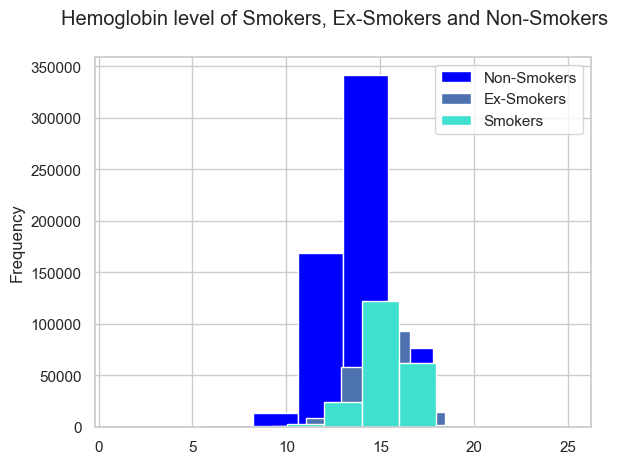

In [134]:
non_smokers['hemoglobin'].plot.hist(label='Non-Smokers',legend=True,color='blue')
ex_smokers['hemoglobin'].plot.hist(label ='Ex-Smokers',legend=True)
smokers['hemoglobin'].plot.hist(label ='Smokers',legend=True,color='turquoise')
plt.suptitle('Hemoglobin level of Smokers, Ex-Smokers and Non-Smokers')

We see that once people start smoking, there hemoglobin level keeps on decreasing even if they leave smoking in the future. 

In [135]:
average_age = df.groupby(['SMK_stat_type_cd'])['age'].mean() 

In [136]:
print(average_age)

SMK_stat_type_cd
1.0    48.455401
2.0    50.112632
3.0    43.203960
Name: age, dtype: float64


These shows the average age of the people who are non-smokers, ex-smokers and smokers.

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


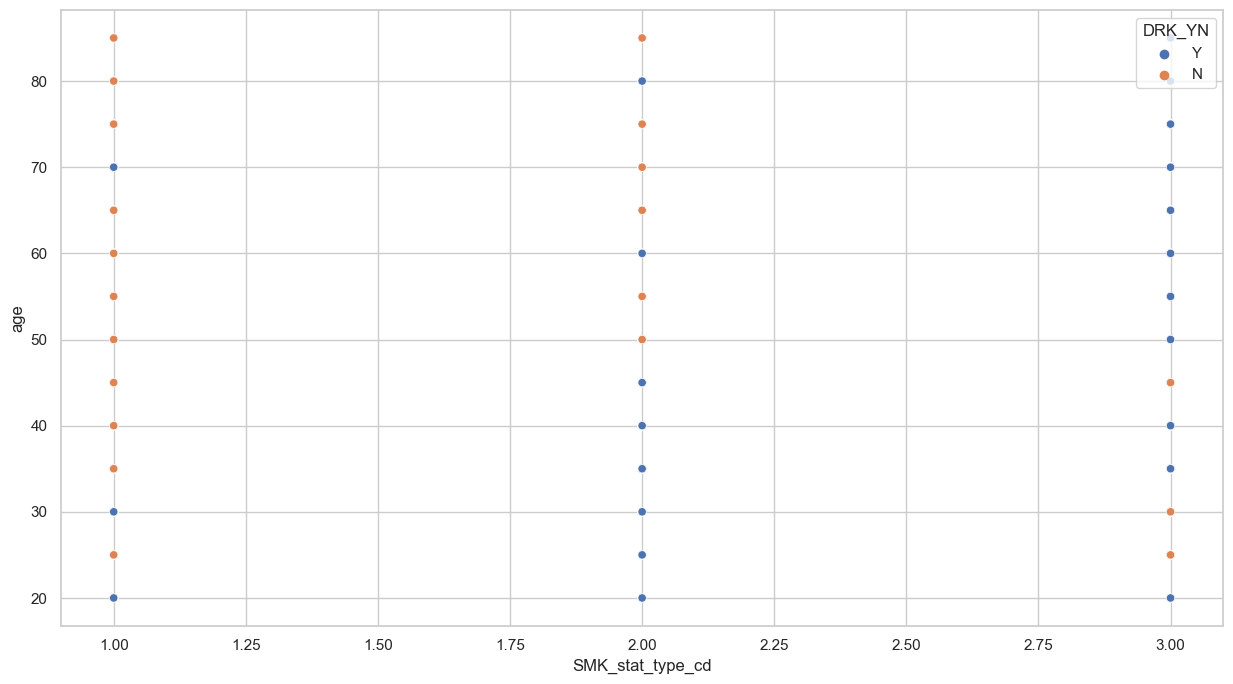

In [137]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x=df["SMK_stat_type_cd"], y=df["age"], hue=df["DRK_YN"], sizes=(20, 200), legend="full")

This shows how the SMK_stat_type_cd varies with age with respect to DRK_YN (hue).

In [138]:
df.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [139]:
for column in df.columns:
    nullvaluesindataset = (df[column] == "unknown").sum()
    print(f"{column} : {nullvaluesindataset}")

sex : 0
age : 0
height : 0
weight : 0
waistline : 0
sight_left : 0
sight_right : 0
hear_left : 0
hear_right : 0
SBP : 0
DBP : 0
BLDS : 0
tot_chole : 0
HDL_chole : 0
LDL_chole : 0
triglyceride : 0
hemoglobin : 0
urine_protein : 0
serum_creatinine : 0
SGOT_AST : 0
SGOT_ALT : 0
gamma_GTP : 0
SMK_stat_type_cd : 0
DRK_YN : 0


There are no NULL or UNKNOWN values in the dataset.

### **2. Data Pre-Processing**


In [140]:
df.nunique()

sex                    2
age                   14
height                13
weight                24
waistline            737
sight_left            24
sight_right           24
hear_left              2
hear_right             2
SBP                  171
DBP                  127
BLDS                 498
tot_chole            474
HDL_chole            223
LDL_chole            432
triglyceride        1657
hemoglobin           190
urine_protein          6
serum_creatinine     183
SGOT_AST             568
SGOT_ALT             594
gamma_GTP            940
SMK_stat_type_cd       3
DRK_YN                 2
dtype: int64

In [141]:
df[df.duplicated].shape

(26, 24)

There were duplicates in the data, which needs to be removed in order to improve the quality of the data. This will also reduce the likelihood of overfitting machine learning models. But, 26 lines of code wont have any effects, as we have practically a millon of values.

But to be on a safer side, we have removed the duplicated data.

In [142]:
df = df.drop_duplicates(keep='first')
df[df.duplicated].shape

(0, 24)

Now, we remove the outliers that we have seen above in the boxplots in order to reduce the biasness and the deviation in the data to train the model accurately.

In [143]:
df.shape

(991320, 24)

In [144]:
def remove_outliers_iqr(dataframe, columns, lower_bound_factor=1.5, upper_bound_factor=1.5):
   
    trimmed_dataframe = dataframe.copy()
    
    for column in columns:
        Q1 = trimmed_dataframe[column].quantile(0.25)
        Q3 = trimmed_dataframe[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - lower_bound_factor * IQR
        upper_bound = Q3 + upper_bound_factor * IQR

        trimmed_dataframe = trimmed_dataframe[(trimmed_dataframe[column] >= lower_bound) & (trimmed_dataframe[column] <= upper_bound)]

    return trimmed_dataframe

columns_to_remove_outliers = df[numeric_columns]
df_new = remove_outliers_iqr(df, columns_to_remove_outliers)

In [145]:
df_new.shape

(631046, 24)

Hence, we have removed the rows which had outliers present in them.

### **3. Data Transformations**

We now try to convert the categorical data into the numeric data in the following few codes. This is done so as to make the dataset compatible with wider range of machine learning models. Also, performing mathematical operations becomes easier.  

In [146]:
df_new.head(100)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,80.0,99.0,193.0,48.0,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,82.0,106.0,228.0,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,87.0,95.0,201.0,76.0,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,82.0,101.0,199.0,61.0,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
5,Male,50,165,55,75.0,1.2,1.5,1.0,1.0,142.0,92.0,99.0,218.0,77.0,95.0,232.0,13.8,3.0,0.8,29.0,40.0,37.0,3.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Female,45,155,55,72.0,0.9,0.9,1.0,1.0,112.0,67.0,88.0,161.0,54.0,86.0,101.0,13.1,1.0,0.9,15.0,9.0,13.0,1.0,Y
141,Female,40,160,50,68.0,0.8,0.9,1.0,1.0,100.0,63.0,76.0,186.0,83.0,92.0,50.0,12.0,1.0,0.9,15.0,13.0,14.0,1.0,Y
142,Female,40,165,60,83.0,1.2,1.0,1.0,1.0,126.0,73.0,101.0,154.0,49.0,92.0,65.0,11.5,1.0,0.7,28.0,25.0,30.0,1.0,Y
143,Male,45,170,60,81.0,1.0,1.0,1.0,1.0,122.0,75.0,95.0,189.0,41.0,119.0,142.0,10.5,1.0,1.1,21.0,15.0,21.0,1.0,N


In [147]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [148]:
mapping = {}

for column in categorical_columns:
    df_new[column] = le.fit_transform(df_new[column]) + 1 #to start the mapping from 1 
    mapping[column] = dict(zip(le.classes_, le.transform(le.classes_) + 1))

In [149]:
for column_name in categorical_columns:
    print(f'Mapping for column "{column_name}":')
    for key, value in mapping[column_name].items():
        print(f'{key}: {value}')
    print()


Mapping for column "sex":
Female: 1
Male: 2

Mapping for column "DRK_YN":
N: 1
Y: 2

Mapping for column "hear_left":
1.0: 1
2.0: 2

Mapping for column "hear_right":
1.0: 1
2.0: 2

Mapping for column "urine_protein":
1.0: 1
2.0: 2
3.0: 3
4.0: 4
5.0: 5
6.0: 6

Mapping for column "SMK_stat_type_cd":
1.0: 1
2.0: 2
3.0: 3



In [150]:
df_new.head(100)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,2,35,170,75,90.0,1.0,1.0,1,1,120.0,80.0,99.0,193.0,48.0,126.0,92.0,17.1,1,1.0,21.0,35.0,40.0,1,2
1,2,30,180,80,89.0,0.9,1.2,1,1,130.0,82.0,106.0,228.0,55.0,148.0,121.0,15.8,1,0.9,20.0,36.0,27.0,3,1
3,2,50,175,80,91.0,1.5,1.2,1,1,145.0,87.0,95.0,201.0,76.0,104.0,106.0,17.6,1,1.1,29.0,34.0,18.0,1,1
4,2,50,165,60,80.0,1.0,1.2,1,1,138.0,82.0,101.0,199.0,61.0,117.0,104.0,13.8,1,0.8,19.0,12.0,25.0,1,1
5,2,50,165,55,75.0,1.2,1.5,1,1,142.0,92.0,99.0,218.0,77.0,95.0,232.0,13.8,3,0.8,29.0,40.0,37.0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,1,45,155,55,72.0,0.9,0.9,1,1,112.0,67.0,88.0,161.0,54.0,86.0,101.0,13.1,1,0.9,15.0,9.0,13.0,1,2
141,1,40,160,50,68.0,0.8,0.9,1,1,100.0,63.0,76.0,186.0,83.0,92.0,50.0,12.0,1,0.9,15.0,13.0,14.0,1,2
142,1,40,165,60,83.0,1.2,1.0,1,1,126.0,73.0,101.0,154.0,49.0,92.0,65.0,11.5,1,0.7,28.0,25.0,30.0,1,2
143,2,45,170,60,81.0,1.0,1.0,1,1,122.0,75.0,95.0,189.0,41.0,119.0,142.0,10.5,1,1.1,21.0,15.0,21.0,1,1


Hence, we have converted the categorical columns to numerical columns with the following mappings shown above, which would be helpful in training the model accurately and efficiently.

In the Pie Chart we have observed that several features are biased towards some particular value or we can say that a particular value keeps on occuring more frequently than the others leading to biasness while training model. As we want to train our model in order to predict whether the person smokes, smoked in past or non smoker, we need to remove the biasness from the particular column. So, we need to perform random oversampling to balance the dataset. 

Axes(0.125,0.11;0.775x0.77)


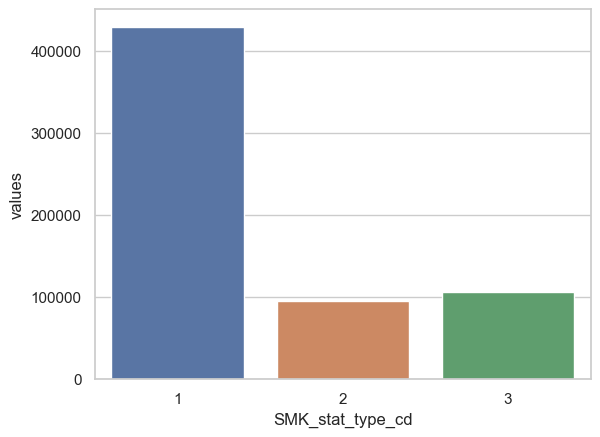

In [151]:
t = df_new["SMK_stat_type_cd"].value_counts()
t_data = pd.DataFrame({'SMK_stat_type_cd':t.index,'values':t.values})
print(sns.barplot(x='SMK_stat_type_cd',y="values",data=t_data))

In [152]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [153]:
x=df_new.drop('SMK_stat_type_cd',axis='columns')
y=df_new['SMK_stat_type_cd']

In [154]:
r = RandomOverSampler()
xs, ys = r.fit_resample(x, y)
print(Counter(ys))
xs.shape

Counter({1: 429726, 3: 429726, 2: 429726})


(1289178, 23)

In [155]:
print(xs.shape)
print(ys.shape)

(1289178, 23)
(1289178,)


Axes(0.125,0.11;0.775x0.77)


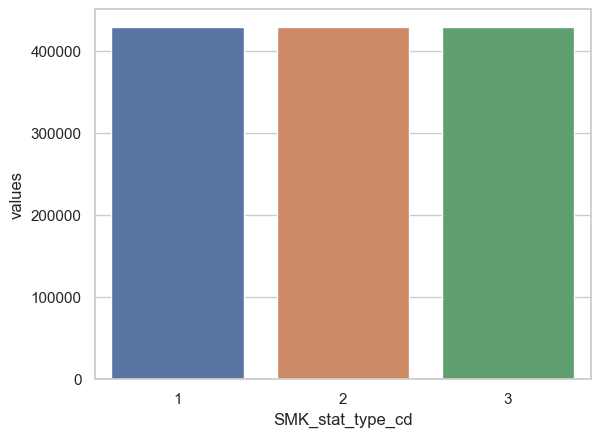

In [156]:
t = ys.value_counts()
t_data = pd.DataFrame({'SMK_stat_type_cd':t.index,'values':t.values})
print(sns.barplot(x='SMK_stat_type_cd',y="values",data=t_data))